# <center> Econ 390: Computational Economics (with Python) </center>
## <center> Homework 12 (Group) </center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .py file and name it as **username_hw12.py**, where username is the username of the group member who submits the homework. 
    - If you work in Jupyter notebook -- you can export it via 'File -> Downloaded As -> Python (.py)' option in the menu bar or copy and paste the code into a blank .py file. **In either case you should remove any test cells/code that is outside of functions.**
    - Submit only username_hw12.py file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    
- We will run your code using the following code (assuming that your file is in the current working directory):

```python 
from importlib import import_module
m=import_module('username_hw12')
m.q#(args)
```

Grading: Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
%matplotlib inline

In [1]:
import os
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd
# for example: %cd "C:\Users\\Purdue\ComputationalEconomicsECON320\Week3_4\Group\"
# Define your data folder here:
datafolder = "C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\hw12\\HW12_Data\\"
# Please use an absolute path
outputfolder= "C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\hw12\\HW12_Output\\"

# Question 1: Role of unemployment benefits

In this question, we will investigate the average duration of unemployment in response to different unemployment compensation amounts. In particular, we will extend the infinite horizon job search model discussed in class to compute the average duration of unemployment when $\beta = 0.9$ and the unemployment compensation takes values $c\in[10,40]$ and the wage offers are drawn from a normal distribution with mean 50 and standard deviation of 10.

In terms of implementation:
- Suppose wage is drawn from Normal(50,10) with boundaries 0 and 100. Specifically, approximate the distribution on a wage grid given by wage_grid = np.linspace(0, 100, 60)
- Suppose various compensation amounts are given by c_vals = np.linspace(10,40,25)
- For each $c \in $ c_vals do the following:
    - compute their reservation wage by solving the dynamic programming problem (as we did in class)
    - Run 10,000 simulations by starting the agent as unemployed. For each simulation record how long it takes for the agent to accept a job offer.
- Plot mean unemployment duration as a function of c in c_vals.

def q1():

    - Output: a plot with x-axis as unemployment compensation level; y-axis as the average duration of unemployment
       saved to file username_hw12_q1.pdf (saved to the output folder)
       Make sure that your graph contains axis labels and proper legends


In [ ]:
def q1():
    
    wage_grid = np.linspace(0, 100, 60)
    c_vals = np.linspace(10,40,25)
    
    
    # (Hint) Randomly draw a wage from the discrete wage values

    from random import choices
    population = wage_mid_values
    weight = approx_pmf
    choices(population, weight)

In [6]:
def q1():
    from scipy.stats import norm as NormalDistribution
    # wage range from 0 to 100
    wage_grid = np.linspace(0, 100, 60)
    distribution = NormalDistribution(50,10)
    approx_pmf = distribution.cdf(wage_grid)[1:]-distribution.cdf(wage_grid)[:-1]
    approx_pmf = approx_pmf/approx_pmf.sum() #normalize to ensure that the sum of probabilities adds up to 1
    wage_mid_values = (wage_grid[1:]+wage_grid[:-1])/2
    
    # Randomly draw a wage from the discrete wage values

    from random import choices
    population = wage_mid_values
    weight = approx_pmf
    choices(population, weight)

    # Define a function to input compensation and return reservation wage
    def reservation(c): 
        beta = 0.9
        wages = wage_mid_values

        # Set up the initial value function
        Vs = wages / (1-beta)

        #Step 2. For a given value function, define a new function that inputs a value of state, 
        # and returns the two terms in the max operation
        # Recall from above, the probability of each state is approx_pmf
        def accept_reject(w, current_Vs, beta, c):
            '''w: wage offer
                value: a given value function
                beta: discount value
                c: unemployment compensation'''
            val_accept = w / (1-beta)
            val_reject = c + beta * np.sum(current_Vs * approx_pmf)

            return np.array([val_accept, val_reject])

        #Step 3. Define the stopping rule, when the difference between the new and the old value function is smaller than 0.01
        # loop over all wage, obtain the new value for each wage, then calculate the difference


        DELTA = 1
        count = 1

        v_next = np.empty_like(Vs)

        while DELTA > .01 :
            for i,w in enumerate(wages):        
                v_next[i] = np.max(accept_reject(w, Vs, beta, c ))

            DELTA=np.max(np.abs(Vs-v_next))

            Vs[:] = v_next
            count+=1
        # Reservation wage:
        wage_r = (1-beta)*(c+beta*np.sum(Vs*approx_pmf))
        return wage_r

    def compute_stopping_time(w_bar, seed=1234):

        np.random.seed(seed)

        population = wage_mid_values
        weight = approx_pmf

        t = 1
        while True:
            # Generate a wage draw

            w = choices(population, weight)
            # Stop when the draw is above the reservation wage
            if w >= w_bar:
                stopping_time = t
                break
            else:
                t += 1
        return stopping_time

    def compute_mean_stopping_time(w_bar, num_reps=10000):
        obs = np.empty(num_reps)
        for i in range(num_reps):
            obs[i] = compute_stopping_time(w_bar, seed=i)
        return obs.mean()

    c_vals = np.linspace(10, 40, 20)
    stop_times = np.empty_like(c_vals)
    for i, c in enumerate(c_vals):
        w_bar = reservation(c)
        stop_times[i] = compute_mean_stopping_time(w_bar)

    fig, ax = plt.subplots()

    ax.plot(c_vals, stop_times, label="mean unemployment duration")
    ax.set(xlabel="unemployment compensation", ylabel="months")
    ax.legend()

    fig.savefig(outputfolder+"yrosokha_hw12_q2.pdf")

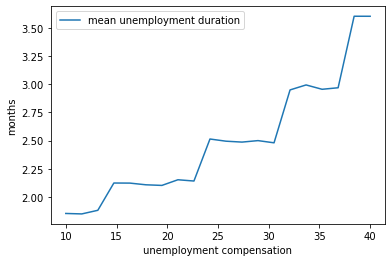

In [7]:
q1()

# Question 2: Job search in recession

In this question, we will investigate job search when the economy could be in two states -- expansion and recession. In particular, we will consider the following variation of the infinite horizon job search problem: 

Assume the job offer's distribution depends on the underlying economy states. There are two states of economy, expansion, and recession. In expansion, the job offer follows a normal distribution of Normal(60,10); in recession, the job offer follows a normal distribution of Normal(30,10). 

The economic transition is modeled by the Markov Chain process:

$$S \in \{Expansion,Recession\}$$

$$M=\left(\begin{array}{cc} 
.8 & .2\\ 
.4 & .6
\end{array}\right)$$

In terms of implementation:
- Suppose wage has boundaries 0 and 100. Specifically, approximate the distribution on a wage grid given by wage_grid = np.linspace(0, 100, 60). In expansion, the wage is drawn from Normal(60,10); in recession, the wage is drawn from Normal(30,10)
- The discount rate is $\beta=0.9$
- The unemployment compensaation $c=25$
- Write a program to implement the value function iteration algorithm and find the optimal policy that maximizes the expected discounted sum of earnings under both states of the economy
- Return the reservation wage for both states

def q2():
    - output: [reservation wage in expasion, reservation wage in recession]

In [ ]:
def q2():
    # wage range from 0 to 100
    wage_grid = np.linspace(0, 100, 60)

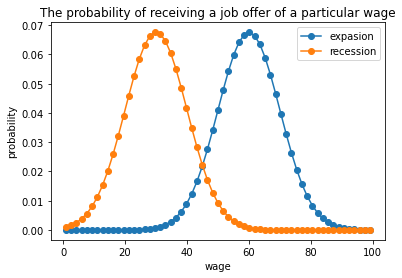

Difference from previous guess: 502.595836785252
Difference from previous guess: 502.595836785252
Difference from previous guess: 27.333940032061435
Difference from previous guess: 63.46918970188159
Difference from previous guess: 14.82053935877525
Difference from previous guess: 33.31417854168376
Difference from previous guess: 8.906713443752437
Difference from previous guess: 18.935024963669946
Difference from previous guess: 5.541143637599703
Difference from previous guess: 11.138923091695688
Difference from previous guess: 3.345564820735035
Difference from previous guess: 6.624611451991427
Difference from previous guess: 2.1530427938370167
Difference from previous guess: 4.027106134812584
Difference from previous guess: 1.349036990809168
Difference from previous guess: 2.4727778841935333
Difference from previous guess: 0.8362499746625645
Difference from previous guess: 1.5223164086104362
Difference from previous guess: 0.5165001477862461
Difference from previous guess: 0.9380235099

array([59.14611535, 51.76552456])

In [193]:
def q2():
    from scipy.stats import norm as NormalDistribution
    # wage range from 0 to 100
    wage_grid = np.linspace(0, 100, 60)


    def prob(mean, sd, wage_grid ):
        distribution = NormalDistribution(mean,sd)
        approx_pmf = distribution.cdf(wage_grid)[1:]-distribution.cdf(wage_grid)[:-1]
        approx_pmf = approx_pmf/approx_pmf.sum() #normalize to ensure that the sum of probabilities adds up to 1
        return approx_pmf

    prob_exp = prob(60,10,wage_grid)
    prob_rec = prob(30,10, wage_grid)

    wage_mid_values = (wage_grid[1:]+wage_grid[:-1])/2

    fig, ax = plt.subplots()
    plt.title("The probability of receiving a job offer of a particular wage")
    ax.plot(wage_mid_values, prob_exp, '-o' , label="expasion")
    ax.plot(wage_mid_values, prob_rec, '-o' , label="recession")
    ax.set_xlabel('wage')
    ax.set_ylabel('probability')
    ax.legend()
    plt.show()

    # Step 1. Initialize value function,
    beta = 0.9
    c = 25
    wages = wage_mid_values
    states = np.arange(2) #state 0="H", state 1="L"

    # Set up the initial value function
    Vs = wages / (1-beta)
    values = np.tile(Vs, (2,1) )



    #Step 2. For a given value function, define a new function that inputs a value of state, 
    # and returns the two terms in the max operation
    # Recall from above, the probability of each state is approx_pmf
    def accept_reject(s, w, values, beta, c):
        '''s: state
            w: wage offer
            value: a given value function
            beta: discount value
            c: unemployment compensation'''
        T = np.array([[.8,.2],[.4,.6]])
        val_accept = w / (1-beta)
        val_reject = c + beta * (T[s,0]*np.sum(values[0] * prob_exp) + T[s,1]*np.sum(values[1] * prob_rec))

        return np.array([val_accept, val_reject])

    #Step 3. Define the stopping rule, when the difference between the new and the old value function is smaller than 0.01
    # loop over all wage, obtain the new value for each wage, then calculate the difference


    DELTA = 1
    count = 1


    while DELTA > .01 :
        DELTA = 0

        v_next = np.empty_like(values)


        for s in states: 
            for i,w in enumerate(wages):        
                v_next[s,i] = np.max(accept_reject(s, w, values, beta, c ))

            DELTA=max(DELTA, np.max(np.abs(values[s,:]-v_next[s,:]) ))

            print("Difference from previous guess:",DELTA)
        values = v_next
        count+=1

    wage_r = np.zeros(2)
    wage_r[0]=(1-beta)*(c+beta*np.sum(values[0]*prob_exp))
    wage_r[1]=(1-beta)*(c+beta*np.sum(values[1]*prob_rec))
    return wage_r

# Question 3: Job Search and Separation

In this question, we will investigate how potential job separations may influence an agent's job search. In particular, we change the assumption that if an agent accepts the job, he will work at the job permanently. 
 
Consider an infinitely lived agent who:
- has the opportunities to work at different wages
- may experience exogenous events that destroy his current job
- needs to restart the job search process when unemployed

The agent will be in one of the two states: employed or unemployed. 

He wants to maximize:
$$ E\sum^{\infty}_{t=0} \beta^t u(y_t)$$

If the agent is currently **employed**:
- he receives utility $u(w_e)$, where $w_e$ is his existing wage level
- may be fired with some small probability $\alpha$

If the agent is currently **unemployed**:
- he either accepts or rejects the current offer $w_t$
- If he accepts, he begins working immediately at wage $w_t$
- If he rejects, he receives unemployment compensation c

To solve the model, we need to define two value functions. Let: 
- $v(w_e)$ be total lifetime value accruing to an agent who enters the current period **employed** with existing wage $w_e$
- $h(w)$ be total lifetime value accruing to an agent who enters the current period **unemployed** and receives wage offer $w$

Our first aim is to obtain the values of these functions.

$v(w_e)$ and $h(w)$ should satisfy:
$$ v(w_e) = u(w_e) + \beta [ (1-\alpha)v(w_e) + \alpha \sum_{w' \in W} h(w') Prob(w') ] $$

and

$$ h(w) = max\{v(w), u(c)+\beta \sum_{w' \in W} h(w')Prob(w') \} $$


- The first equation shows the value of being employed at wage $w_e$ can be expressed as the **addition** of
    - current reward $u(w_e)$
    - discounted expected reward tomorrow, given the $\alpha$ probability of being fired
- The second equation shows the value of being unemployed with offer $w$ can be expressed as the **maximum** over
    - accept the job offer $v(w)$
    - reject the job offer 
    
These two equations can be further simplified as the following:

First, let $d$ be the expected value of unemployment tomorrow:  
$$ d = \sum_{w' \in W} h(w')q(w') $$

Second, we shift the value function $h(w)$ foward one period, obtain: 
$$ h(w') = max\{ v(w') , u(c)+\beta d \} $$

This means $d$ can be expressed as:
$$ d = \sum_{w' \in W} h(w')q(w') = \sum_{w' \in W}   max\{ v(w') , u(c)+\beta d \} q(w') $$ 
    
To sum up, we transform the $v(w_e)$ and $h(w)$ into:

- Equation 1 :  $ v(w) =   u(w) + \beta [ (1-\alpha)v(w) + \alpha d] $
- Equation 2:   $ d = \sum_{w' \in W}   max\{ v(w') , u(c)+\beta d \} q(w') $
  
Use the iterative approach to solve the two Bellman equations
- 1. Make guesses for d and v;
- 2. Plug these guesses into the right-hand side of Equation 1 and 2;
- 3. Update the left-hand sides from this rule and repeat

( Both equations need to converge) 

In terms of implementation:

- Iteration process is as follows:
    - Starting from some initial conditions, $d_0$, $v_0$, iterate over:
$$ v_{n+1}(w) =   u(w) + \beta [ (1-\alpha)v_{n}(w) + \alpha d_{n}] $$
$$ d_{n+1} = \sum_{w' \in W}   max\{ v_n(w') , u(c)+\beta d_n \} q(w') $$

- The probability of job separation is $\alpha = .2$

- The discount rate is $\beta = .98$

- The unemployment compensation is $c=6$

- Wage is drawn from Normal(50,10) and bounded between 0 and 100. Specifically, approximate the distribution on a wage grid given by wage_grid = np.linspace(0, 100, 60)

- The utiity functoin is $u(c)=ln(w)$

- Set the convergence standard to be: error <= 1e-5

- Please write a program to implement the value function iteration algorithm and find the optimal policy that maximizes the expected discounted sum of earnings.

def q3():
    - output1: a plot that shows the values of v and h functions over the wage grid;
        saved to file username_hw12_q3.pdf (saved to the output folder)
       *Make sure that your graph contains axis labels and proper legends

    - output2: the reservation wage  (the wage that an agent should accept the offer when unemployed)


In [ ]:
def q3():
    

    wage_grid = np.linspace(0, 100, 60)

In [8]:
def q3():
    


    from scipy.stats import norm as NormalDistribution
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.optimize as so

    def u(c):
        return np.log(c) #utility = income

    # Assume normal distribution:
    wage_grid = np.linspace(0, 100, 60)
    distribution = NormalDistribution(50,10)
    approx_pmf = distribution.cdf(wage_grid)[1:]-distribution.cdf(wage_grid)[:-1]
    approx_pmf = approx_pmf/approx_pmf.sum() #normalize to ensure that the sum of probabilities adds up to 1
    q = approx_pmf
    wage_mid_values = (wage_grid[1:]+wage_grid[:-1])/2
    w_range = wage_mid_values
    
    # Initial values of v and d:
    v = np.ones_like(w_range)
    d = 1
    i = 0
    error = .01 + 1

    alpha = .2
    beta = .98
    c = 6

    def iteration(v, d):    
        v_new = np.empty_like(v)
        for i in range(len(w_range)):
            v_new[i] = u(w_range[i]) + beta*( (1-alpha)*v[i] + alpha * d)

        d_new = np.sum(np.maximum(v, u(c)+beta*d)*q)    
        return v_new, d_new

    while error > 1e-5 and i <= 2000 :
        print()
        print("Interation: " + str(i)) 

        v_new, d_new = iteration(v,d)
        error_1 = np.max(np.abs(v_new-v))
        error_2 = np.abs(d_new-d)
        error = max(error_1, error_2)

        v = v_new
        d = d_new

        print(v)
        print(d)
        i += 1 

        
    v
    d
    h = u(c) + beta * d

    fig, ax = plt.subplots()

    ax.plot(w_range, v, 'b-', lw=2, alpha=0.7, label='$v$')
    ax.plot(w_range, [h] * len(w_range),
            'g-', lw=2, alpha=0.7, label='$h$')
    ax.set_xlim(min(w_range), max(w_range))
    ax.legend()

    plt.show()
    
    # Reservation wage:
    # the smallest w that makes v(w)>= h
    for i, wage in enumerate(w_range):
        if v[i] > h:
            w_bar = wage
            break
    print(wage)


Interation: 0
[0.81448556 1.91309785 2.42392347 2.76039571 3.01171014 3.21238083
 3.37943492 3.52253576 3.64769891 3.75892454 3.859008   3.94997978
 4.03336139 4.11032243 4.18178139 4.24847277 4.31099312 4.36983362
 4.42540347 4.47804721 4.52805763 4.57568568 4.62114805 4.66463316
 4.70630586 4.74631119 4.78477748 4.82181875 4.85753683 4.89202301
 4.92535943 4.95762029 4.98887283 5.01917818 5.04859207 5.07716544
 5.104945   5.13197368 5.15829098 5.18393341 5.20893472 5.23332617
 5.25713682 5.28039368 5.30312193 5.32534507 5.34708505 5.36836245
 5.38919654 5.40960541 5.42960608 5.44921455 5.46844591 5.4873144
 5.50583344 5.52401576 5.54187338 5.55941769 5.5766595 ]
2.7717594692280554

Interation: 1
[1.0163071  2.97623142 3.88754433 4.4878108  4.93615574 5.29415226
 5.59217675 5.84746866 6.0707597  6.26918624 6.44773513 6.61002878
 6.75878157 6.89608007 7.02356286 7.14254027 7.25407659 7.35904804
 7.45818465 7.55210107 7.64131966 7.7262881  7.80739298 7.88497042
 7.95931451 8.03068403 8

Interation: 229
[171.92955195 177.01571995 179.3806534  180.93839523 182.10188796
 183.03091896 183.8043175  184.4668214  185.0462804  185.56121389
 186.02456324 186.44572888 186.83175484 187.18805596 187.5188845
 187.82764086 188.11708696 188.38949668 188.64676451 188.8904855
 189.12201522 189.34251545 189.5529894  189.75430937 189.94723852
 190.1324484  190.31053303 190.4820204  190.6473819  190.80704012
 190.9613754  191.11073124 191.25541894 191.39572149 191.53189688
 191.66418101 191.79279011 191.91792285 192.03976224 192.15847719
 192.27422396 192.38714736 192.49738184 192.6050525  192.71027589
 192.81316078 192.91380886 193.01231534 193.10876944 193.20325496
 193.29585064 193.3866306  193.47566468 193.56301878 193.64875511
 193.73293251 193.81560667 193.89683032 193.9766535 ]
190.659732561301

Interation: 230
[171.99656187 177.08272988 179.44766332 181.00540516 182.16889788
 183.09792888 183.87132742 184.53383132 185.11329032 185.62822381
 186.09157316 186.5127388  186.89876477 

194.51656047609893

Interation: 402
[175.72604786 180.81221586 183.17714931 184.73489114 185.89838387
 186.82741487 187.60081341 188.26331731 188.84277631 189.3577098
 189.82105915 190.24222479 190.62825075 190.98455187 191.31538041
 191.62413677 191.91358287 192.18599259 192.44326042 192.68698141
 192.91851113 193.13901136 193.34948531 193.55080528 193.74373443
 193.92894431 194.10702894 194.27851631 194.44387781 194.60353603
 194.75787131 194.90722715 195.05191485 195.1922174  195.32839279
 195.46067692 195.58928601 195.71441876 195.83625815 195.9549731
 196.07071987 196.18364327 196.29387775 196.40154841 196.5067718
 196.60965669 196.71030477 196.80881125 196.90526535 196.99975087
 197.09234655 197.18312651 197.27216059 197.35951469 197.44525102
 197.52942842 197.61210258 197.69332623 197.77314941]
194.52032849405856

Interation: 403
[175.72969147 180.81585947 183.18079292 184.73853475 185.90202748
 186.83105847 187.60445701 188.26696092 188.84641991 189.36135341
 189.82470276 190.2

 197.73644419 197.81911835 197.900342   197.98016518]
194.73083951735362

Interation: 579
[175.93325199 181.01942    183.38435344 184.94209528 186.105588
 187.034619   187.80801754 188.47052144 189.04998044 189.56491393
 190.02826328 190.44942892 190.83545489 191.191756   191.52258454
 191.8313409  192.120787   192.39319672 192.65046455 192.89418554
 193.12571527 193.34621549 193.55668945 193.75800941 193.95093856
 194.13614844 194.31423308 194.48572044 194.65108194 194.81074016
 194.96507544 195.11443128 195.25911898 195.39942153 195.53559692
 195.66788105 195.79649015 195.92162289 196.04346228 196.16217724
 196.27792401 196.3908474  196.50108188 196.60875254 196.71397593
 196.81686082 196.91750891 197.01601538 197.11246949 197.206955
 197.29955068 197.39033064 197.47936473 197.56671882 197.65245515
 197.73663256 197.81930671 197.90053037 197.98035354]
194.73103106025252

Interation: 580
[175.93343721 181.01960522 183.38453866 184.9422805  186.10577322
 187.03480422 187.80820276 188.4

 197.7466421  197.82931626 197.91053991 197.99036309]
194.74120961041993

Interation: 718
[175.94327969 181.0294477  183.39438114 184.95212298 186.1156157
 187.0446467  187.81804524 188.48054914 189.06000814 189.57494164
 190.03829098 190.45945662 190.84548259 191.2017837  191.53261224
 191.8413686  192.1308147  192.40322442 192.66049225 192.90421324
 193.13574297 193.35624319 193.56671715 193.76803711 193.96096626
 194.14617614 194.32426078 194.49574814 194.66110964 194.82076786
 194.97510314 195.12445898 195.26914668 195.40944923 195.54562462
 195.67790876 195.80651785 195.93165059 196.05348998 196.17220494
 196.28795171 196.4008751  196.51110959 196.61878024 196.72400363
 196.82688852 196.92753661 197.02604308 197.12249719 197.2169827
 197.30957838 197.40035834 197.48939243 197.57674652 197.66248285
 197.74666026 197.82933441 197.91055807 197.99038124]
194.74122806882576

Interation: 719
[175.94329754 181.02946555 183.39439899 184.95214083 186.11563355
 187.04466455 187.81806309 188

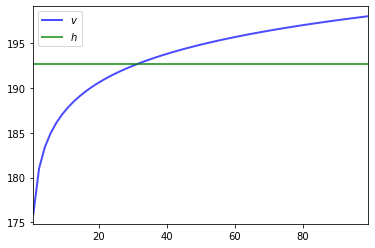

31.355932203389827


In [9]:
q3()